In [1]:
import pandas as pd

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from keras.preprocessing.text import one_hot,Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [3]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv("C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Capstone\\hindenberg tweet\\archive\\HindenBerg_Report.csv")

In [5]:
# Preview
df.head()

,Unnamed: 0,date,id,Tweets,likes,retweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0


In [6]:
# Check Columns
df.columns

Index(['Unnamed: 0', 'date', 'id', 'Tweets', 'likes', 'retweets'], dtype='object')

In [7]:
# Datatype
df.dtypes

Unnamed: 0     int64
date          object
id             int64
Tweets        object
likes          int64
retweets       int64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0    0
date          0
id            0
Tweets        0
likes         0
retweets      0
dtype: int64

In [9]:
!pip install neattext

In [10]:
# Load Text Cleaning Package
import neattext.functions as nfx


In [11]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
df['Tweets'].iloc[2]

'@_pallavighosh ji So @RahulGandhi has spoken on Hindenberg Report as well that too in parliament 😂'

Noise:

#remove mentions/userhandles

#remove hashtags

#urls

#emojis

#special char


In [13]:
# Cleaning Text
df['clean_tweet'] = df['Tweets'].apply(nfx.remove_hashtags)

In [14]:
df[['Tweets','clean_tweet']]


,Tweets,clean_tweet
0,@hegade_u @JhaSanjay Let this Jha2 read carefu...,@hegade_u @JhaSanjay Let this Jha2 read carefu...
1,@CursedSe7en @Memeghnad Yes and like RG bashed...,@CursedSe7en @Memeghnad Yes and like RG bashed...
2,@_pallavighosh ji So @RahulGandhi has spoken o...,@_pallavighosh ji So @RahulGandhi has spoken o...
3,With so much venom being spewed by Congress dy...,With so much venom being spewed by Congress dy...
4,Hindenberg is banned by SEC from participating...,Hindenberg is banned by SEC from participating...
...,...,...
997,"ये महाशय तो LIC पर लेक्चर दे रहे है, hindenber...","ये महाशय तो LIC पर लेक्चर दे रहे है, hindenber..."
998,He may soon lose his crown as Asia's wealthies...,He may soon lose his crown as Asia's wealthies...
999,to discredit India. Remember the #BarkhaDutt p...,to discredit India. Remember the pictures al...
1000,@Saurabh_MLAgk Pappus should short the stock i...,@Saurabh_MLAgk Pappus should short the stock i...


In [15]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [16]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_emojis(x))

In [17]:
df[['Tweets','clean_tweet']]

,Tweets,clean_tweet
0,@hegade_u @JhaSanjay Let this Jha2 read carefu...,"Let this Jha2 read carefully drafted "" leg..."
1,@CursedSe7en @Memeghnad Yes and like RG bashed...,"Yes and like RG bashed Adani, Modi should ..."
2,@_pallavighosh ji So @RahulGandhi has spoken o...,ji So has spoken on Hindenberg Report as w...
3,With so much venom being spewed by Congress dy...,With so much venom being spewed by Congress dy...
4,Hindenberg is banned by SEC from participating...,Hindenberg is banned by SEC from participating...
...,...,...
997,"ये महाशय तो LIC पर लेक्चर दे रहे है, hindenber...","ये महाशय तो LIC पर लेक्चर दे रहे है, hindenber..."
998,He may soon lose his crown as Asia's wealthies...,He may soon lose his crown as Asia's wealthies...
999,to discredit India. Remember the #BarkhaDutt p...,to discredit India. Remember the pictures al...
1000,@Saurabh_MLAgk Pappus should short the stock i...,Pappus should short the stock if they believ...


In [18]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [19]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [20]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [22]:
# Cleaning Text: StopWords
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [24]:
df['clean_tweet']= df['clean_tweet'].apply(lambda x: stemming(x))

In [25]:
df[['Tweets','clean_tweet']]

,Tweets,clean_tweet
0,@hegade_u @JhaSanjay Let this Jha2 read carefu...,Let Jha2 read carefully drafted legal disclaim...
1,@CursedSe7en @Memeghnad Yes and like RG bashed...,Yes like RG bashed Adani Modi bash Adani Forge...
2,@_pallavighosh ji So @RahulGandhi has spoken o...,ji spoken Hindenberg Report parliament
3,With so much venom being spewed by Congress dy...,venom spewed Congress dynast Adani group parli...
4,Hindenberg is banned by SEC from participating...,Hindenberg banned SEC participating markets ta...
...,...,...
997,"ये महाशय तो LIC पर लेक्चर दे रहे है, hindenber...",ये महाशय तो LIC पर लेक्चर दे रहे है hindenberg...
998,He may soon lose his crown as Asia's wealthies...,soon lose crown Asias wealthiest person longti...
999,to discredit India. Remember the #BarkhaDutt p...,discredit India Remember pictures Danish kicke...
1000,@Saurabh_MLAgk Pappus should short the stock i...,Pappus short stock believe hindenberg report


In [26]:
#as u can see from above data there are few tweets which are in non english language.so we keep only those tweets which contain english letters
df["english_tweets"] = ""
# define regular expression to match English letters and numbers
english_regex = re.compile(r"[a-zA-Z0-9]+")
# Fill the new column with English tweets only

# loop through each tweet and add to new column if English
for index, row in df.iterrows():
    tweet = row["clean_tweet"]
    english_tweet = " ".join(word for word in tweet.split() if english_regex.match(word))
    df.at[index, "english_tweets"] = english_tweet

In [27]:
df['clean_tweet'] = df['english_tweets']

In [28]:
df.drop(columns=["english_tweets"], inplace=True)


Sentiment Analysis

In [29]:
!pip install textblob

In [30]:
from textblob import TextBlob

In [31]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [32]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [33]:

get_sentiment(ex1)

{'polarity': 0.05, 'subjectivity': 0.6, 'sentiment': 'Positive'}

In [34]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [35]:

df['sentiment_results']

0       {'polarity': 0.05, 'subjectivity': 0.6, 'senti...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.04727272727272728, 'subjectivit...
4       {'polarity': -0.1, 'subjectivity': 0.6, 'senti...
                              ...                        
997     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
998     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
999     {'polarity': 0.0, 'subjectivity': 0.1, 'sentim...
1000    {'polarity': 0.0, 'subjectivity': 0.3, 'sentim...
1001    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 1002, dtype: object

In [36]:
df['sentiment_results'].iloc[0]

{'polarity': 0.05, 'subjectivity': 0.6, 'sentiment': 'Positive'}

In [37]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.05,0.6,Positive


In [38]:

df = df.join(pd.json_normalize(df['sentiment_results']))

In [39]:
df.head()

,Unnamed: 0,date,id,Tweets,likes,retweets,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,Let Jha2 read carefully drafted legal disclaim...,"{'polarity': 0.05, 'subjectivity': 0.6, 'senti...",0.050000,0.600000,Positive
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,Yes like RG bashed Adani Modi bash Adani Forge...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,ji spoken Hindenberg Report parliament,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,venom spewed Congress dynast Adani group parli...,"{'polarity': 0.04727272727272728, 'subjectivit...",0.047273,0.312576,Positive
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,Hindenberg banned SEC participating markets ta...,"{'polarity': -0.1, 'subjectivity': 0.6, 'senti...",-0.100000,0.600000,Negative


In [40]:
df['sentiment'].value_counts()

Neutral     501
Positive    308
Negative    193
Name: sentiment, dtype: int64

<AxesSubplot:>

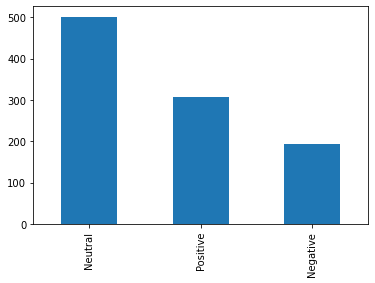

In [41]:
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

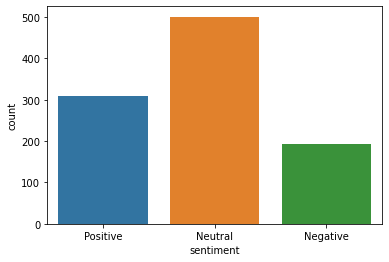

In [42]:
# Plot with seaborn
sns.countplot(df['sentiment'])

 Keyword Extraction

In [43]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [44]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']


In [45]:
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [46]:
positive_tweet

0      Let Jha2 read carefully drafted legal disclaim...
3      venom spewed Congress dynast Adani group parli...
6      Adani group faces severe losses BILLION hinden...
8      Hindenberg report climate change amp Gujarat r...
10     Markets India abroad accepted vision IndiaI du...
                             ...                        
972    Hindenberg report threat Adanis FPO subscribe ...
975    Ironic gleeful celebrations began Hindenberg R...
981    Hindenberg report correct normal investir buy ...
985    Hindenberg report threat Adanis FPO subscribe ...
996    clarifications wont satisfy public large Hinde...
Name: clean_tweet, Length: 308, dtype: object

In [47]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [48]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()


In [49]:
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [50]:
positive_tweet_list 

['Let Jha2 read carefully drafted legal disclaimer Hindenberg selected words safety avoid accountabilityresponsibility source information findings report',
 'venom spewed Congress dynast Adani group parliament clear Hindenberg report history Independent India Industrialist personally targeted parliament Congress partys scion stooped new low',
 'Adani group faces severe losses BILLION hindenberg report different business experts analyst coaches came foot exposed hindenberg report said ADANI group fundamentally strong',
 'Hindenberg report climate change amp Gujarat riots Mughals targeted) linked thinks Mughals good bet IndoUS relations Mughals elected power Owaisi Pikachu campaign',
 'Markets India abroad accepted vision IndiaI dusted basic hypothesis shares/turnover overpricedwhen real underpricedaccording vision share price ie Rs 10691',
 'Whats new Hindenberg report says new business group India shore links extend family group big corporates India political outfits big MNCs shore hol

In [51]:
# Tokenization
for line in positive_tweet_list:
    print(line)
    for token in line.split():
        print(token)


Let Jha2 read carefully drafted legal disclaimer Hindenberg selected words safety avoid accountabilityresponsibility source information findings report
Let
Jha2
read
carefully
drafted
legal
disclaimer
Hindenberg
selected
words
safety
avoid
accountabilityresponsibility
source
information
findings
report
venom spewed Congress dynast Adani group parliament clear Hindenberg report history Independent India Industrialist personally targeted parliament Congress partys scion stooped new low
venom
spewed
Congress
dynast
Adani
group
parliament
clear
Hindenberg
report
history
Independent
India
Industrialist
personally
targeted
parliament
Congress
partys
scion
stooped
new
low
Adani group faces severe losses BILLION hindenberg report different business experts analyst coaches came foot exposed hindenberg report said ADANI group fundamentally strong
Adani
group
faces
severe
losses
BILLION
hindenberg
report
different
business
experts
analyst
coaches
came
foot
exposed
hindenberg
report
said
ADANI
gro

In [52]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [53]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]


In [54]:
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [55]:

pos_tokens

['Let',
 'Jha2',
 'read',
 'carefully',
 'drafted',
 'legal',
 'disclaimer',
 'Hindenberg',
 'selected',
 'words',
 'safety',
 'avoid',
 'accountabilityresponsibility',
 'source',
 'information',
 'findings',
 'report',
 'venom',
 'spewed',
 'Congress',
 'dynast',
 'Adani',
 'group',
 'parliament',
 'clear',
 'Hindenberg',
 'report',
 'history',
 'Independent',
 'India',
 'Industrialist',
 'personally',
 'targeted',
 'parliament',
 'Congress',
 'partys',
 'scion',
 'stooped',
 'new',
 'low',
 'Adani',
 'group',
 'faces',
 'severe',
 'losses',
 'BILLION',
 'hindenberg',
 'report',
 'different',
 'business',
 'experts',
 'analyst',
 'coaches',
 'came',
 'foot',
 'exposed',
 'hindenberg',
 'report',
 'said',
 'ADANI',
 'group',
 'fundamentally',
 'strong',
 'Hindenberg',
 'report',
 'climate',
 'change',
 'amp',
 'Gujarat',
 'riots',
 'Mughals',
 'targeted)',
 'linked',
 'thinks',
 'Mughals',
 'good',
 'bet',
 'IndoUS',
 'relations',
 'Mughals',
 'elected',
 'power',
 'Owaisi',
 'Pikachu'

In [56]:
neg_tokens

['Hindenberg',
 'banned',
 'SEC',
 'participating',
 'markets',
 'taking',
 'report',
 'listed',
 'company',
 '2/',
 'lot',
 'happened',
 'Group',
 'Hindenberg',
 'USbased',
 'research',
 'firm',
 'released',
 '413page',
 'report',
 'accused',
 'conglomerate',
 'manipulating',
 'partaking',
 'accounting',
 'fraud',
 'long',
 'report',
 'based',
 'hard',
 'core',
 'research',
 'company',
 'research',
 'illigality',
 'believe',
 'hindenberg',
 'sued',
 'multiple',
 'occasions',
 'earlier',
 'Adani',
 'PM',
 'MODY',
 'GUILTY',
 'CARNAGE',
 'GUJARAT',
 'RIOTS',
 'AFRAID',
 'ALLOWING',
 'BBC',
 'TAPES',
 'SHOWN',
 'THANK',
 'GOD',
 'BLOCK',
 'HINDENBERG',
 'REPORT',
 'ADANIS',
 'INDIA',
 'WORSHIPPING',
 'RIGHT',
 'INFORMATION',
 'TRUE',
 'TEST',
 'DEMOCRACY',
 'dont',
 'know',
 'know',
 'subject',
 'poltics',
 'politics',
 'OK',
 'Hindenberg',
 'report',
 'read',
 'opinion',
 'think',
 'wrong',
 'like',
 'dont',
 'proof',
 'Hindenberg',
 'report',
 'fake',
 'baba',
 'ramdevs',
 'companies',

In [57]:
neut_tokens

['Yes',
 'like',
 'RG',
 'bashed',
 'Adani',
 'Modi',
 'bash',
 'Adani',
 'Forget',
 'investigate',
 'shell',
 'companies',
 'mentioned',
 'Hindenberg',
 'report',
 'ji',
 'spoken',
 'Hindenberg',
 'Report',
 'parliament',
 'RaGa',
 'attacking',
 'Adani',
 'Hes',
 'attacking',
 'biggest',
 'strength',
 'opponent',
 'money',
 'Bharat',
 'jodo',
 'BBC',
 'documentary',
 'Hindenberg',
 'report',
 'JPC',
 'demand',
 'coordinated',
 'attack',
 'till',
 'date',
 'intersting',
 'point',
 'raised',
 'talked',
 'shell',
 'companies',
 'linked',
 'Adani',
 'stocks',
 'Adani',
 'Group',
 'operates',
 'strategic',
 'sectors',
 'owns',
 'shell',
 'companies',
 'national',
 'concern',
 'PM',
 'respond',
 'Indias',
 'Rs',
 '20',
 'lakh',
 'crore',
 'Covid',
 'relief',
 'package',
 'largest',
 'world',
 'Money',
 'Went',
 'Arey',
 'lath',
 'core',
 'U',
 'got',
 'caught',
 'Sadguru',
 'tweet',
 'Indian',
 'Economy',
 'twice',
 'u',
 'said',
 'Hindenberg',
 'maroons',
 'report',
 'hitjob',
 'Indian',
 

In [58]:
# Get Most Commonest Keywords
from collections import Counter

In [59]:
# Get Most Commonest Keywords
from collections import Counter
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [60]:
get_tokens(pos_tokens)

{'report': 283,
 'Hindenberg': 205,
 'Adani': 139,
 'hindenberg': 61,
 'India': 57,
 'amp': 46,
 'company': 29,
 'Report': 29,
 'market': 29,
 'group': 28,
 'adani': 28,
 'Indian': 27,
 'FPO': 25,
 'like': 24,
 'money': 20,
 'believe': 19,
 'stocks': 18,
 'companies': 17,
 'good': 16,
 'time': 16,
 'know': 15,
 'fraud': 15,
 'news': 15,
 'come': 15,
 'people': 15,
 'u': 14,
 'LIC': 14,
 'fall': 14,
 'hai': 13,
 'short': 13}

In [61]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [62]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [63]:

neg_df

,words,scores
0,report,172
1,Hindenberg,136
2,Adani,91
3,hindenberg,36
4,Indian,26
5,amp,25
6,India,25
7,wrong,20
8,dont,19
9,fake,18


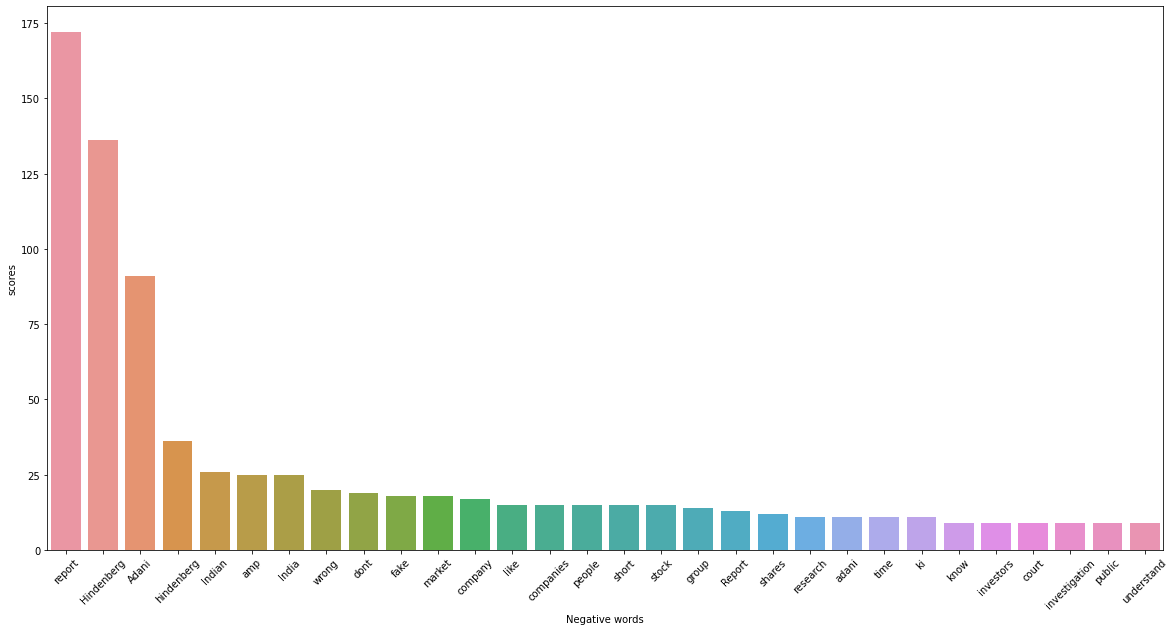

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xlabel('Negative words')
plt.xticks(rotation=45)
plt.show()

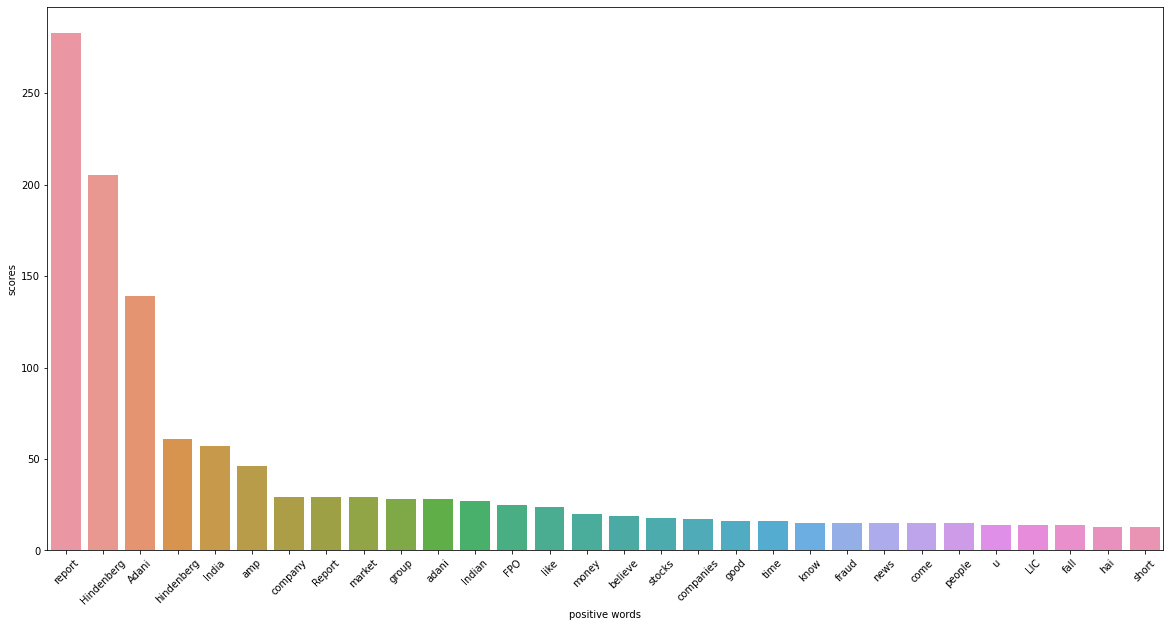

In [65]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xlabel('positive words')
plt.xticks(rotation=45)
plt.show()

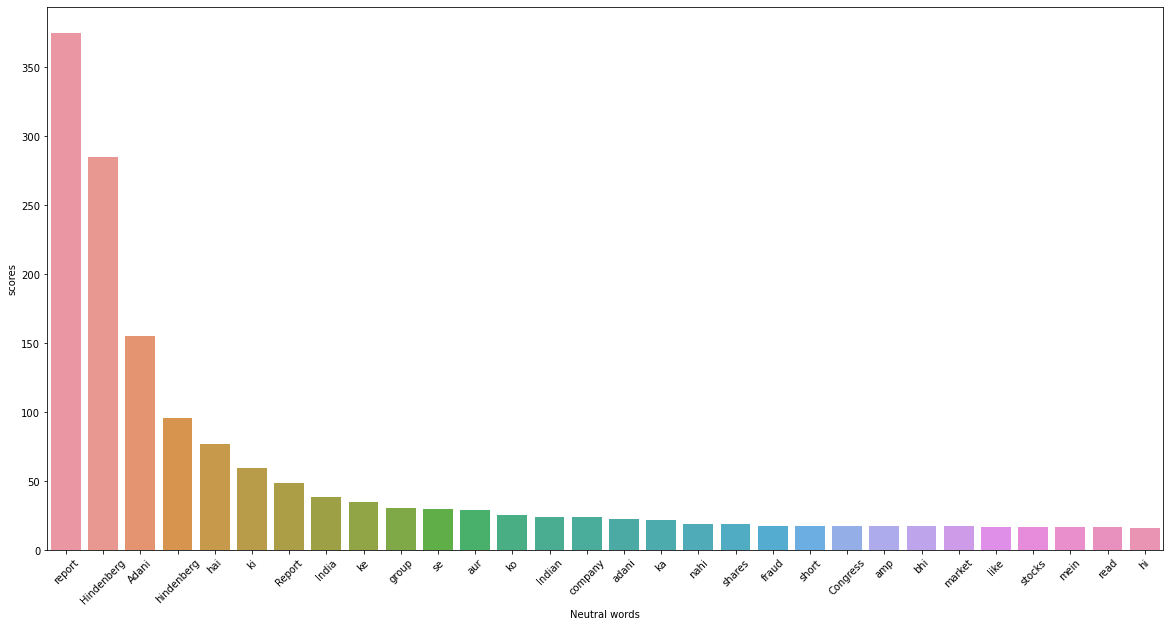

In [66]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xlabel('Neutral words')
plt.xticks(rotation=45)
plt.show()

In [67]:
### Word Cloud
from wordcloud import WordCloud

In [68]:
def plot_wordcloud(docx):
    plt.figure(figsize=(5,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [69]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

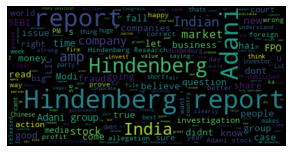

In [70]:
plot_wordcloud(pos_docx)

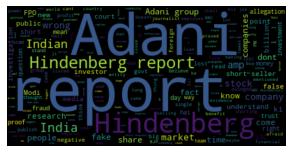

In [71]:
plot_wordcloud(neg_docx)

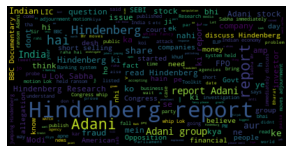

In [72]:
plot_wordcloud(neu_docx)

# Model Building


In [109]:
df.drop(columns=["Unnamed: 0",'date','id','Tweets','likes','retweets','polarity','subjectivity','sentiment_results'], inplace=True)

In [110]:
df['sentiment']=df.get('sentiment').replace('Positive',1)
df['sentiment']=df.get('sentiment').replace('Neutral',1)
df['sentiment']=df.get('sentiment').replace('Negative',0)

In [111]:
df.head()

,clean_tweet,sentiment
0,Let Jha2 read carefully drafted legal disclaim...,1
1,Yes like RG bashed Adani Modi bash Adani Forge...,1
2,ji spoken Hindenberg Report parliament,1
3,venom spewed Congress dynast Adani group parli...,1
4,Hindenberg banned SEC participating markets ta...,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

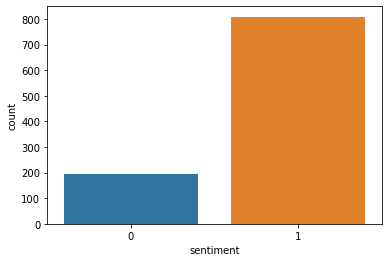

In [112]:
# Plot with seaborn
sns.countplot(df['sentiment'])

In [113]:
X=df['clean_tweet']

y=df['sentiment']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs


# Preparing embedding layer

Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then used as the first layer for the deep learning models in Keras.

In [115]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [116]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

4123

In [117]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [118]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [119]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [120]:
embedding_matrix.shape

(4123, 100)

# Simple Neural Network

In [123]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [124]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          412300    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 422,301
Trainable params: 10,001
Non-trainable params: 412,300
_________________________________________________________________
None


In [125]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
5/5 [==============================] - 1s 56ms/step - loss: 0.6608 - acc: 0.6469 - val_loss: 0.5734 - val_acc: 0.7888
Epoch 2/6
5/5 [==============================] - 0s 15ms/step - loss: 0.5780 - acc: 0.7875 - val_loss: 0.5345 - val_acc: 0.8261
Epoch 3/6
5/5 [==============================] - 0s 16ms/step - loss: 0.5279 - acc: 0.7953 - val_loss: 0.5266 - val_acc: 0.8261
Epoch 4/6
5/5 [==============================] - 0s 15ms/step - loss: 0.4861 - acc: 0.8047 - val_loss: 0.5291 - val_acc: 0.8323
Epoch 5/6
5/5 [==============================] - 0s 14ms/step - loss: 0.4569 - acc: 0.8297 - val_loss: 0.5391 - val_acc: 0.8012
Epoch 6/6
5/5 [==============================] - 0s 16ms/step - loss: 0.4305 - acc: 0.8594 - val_loss: 0.5368 - val_acc: 0.8075


In [126]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 4ms/step - loss: 0.5327 - acc: 0.7960


In [127]:
# Model Performance

print("test loss:", score[0])
print("Test Accuracy:", score[1])

test loss: 0.5327114462852478
Test Accuracy: 0.7960199117660522


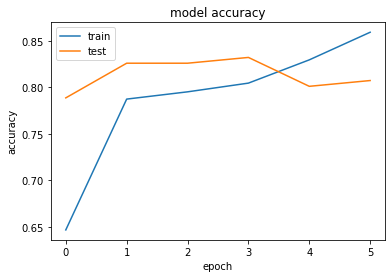

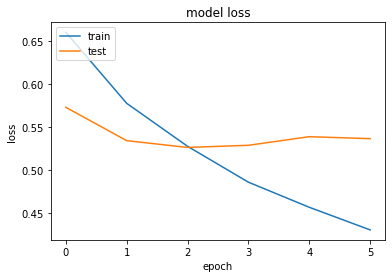

In [128]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Recurrent Neural Network (LSTM)

In [130]:
from keras.layers import LSTM

In [131]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [132]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          412300    
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 529,677
Trainable params: 117,377
Non-trainable params: 412,300
_________________________________________________________________
None


In [133]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
5/5 [==============================] - 5s 381ms/step - loss: 0.6812 - acc: 0.7234 - val_loss: 0.6443 - val_acc: 0.8509
Epoch 2/6
5/5 [==============================] - 1s 208ms/step - loss: 0.5845 - acc: 0.7969 - val_loss: 0.4191 - val_acc: 0.8509
Epoch 3/6
5/5 [==============================] - 1s 192ms/step - loss: 0.4996 - acc: 0.7969 - val_loss: 0.4234 - val_acc: 0.8509
Epoch 4/6
5/5 [==============================] - 1s 195ms/step - loss: 0.4803 - acc: 0.7969 - val_loss: 0.4512 - val_acc: 0.8199
Epoch 5/6
5/5 [==============================] - 1s 190ms/step - loss: 0.4652 - acc: 0.7984 - val_loss: 0.4067 - val_acc: 0.8509
Epoch 6/6
5/5 [==============================] - 1s 195ms/step - loss: 0.4766 - acc: 0.7969 - val_loss: 0.4073 - val_acc: 0.8509


In [135]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 24ms/step - loss: 0.4557 - acc: 0.8060


In [136]:
# Model Performance

print("Test loss:", score[0])
print("Test Accuracy:", score[1])

Test loss: 0.455666184425354
Test Accuracy: 0.8059701323509216


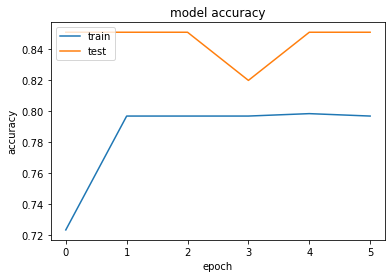

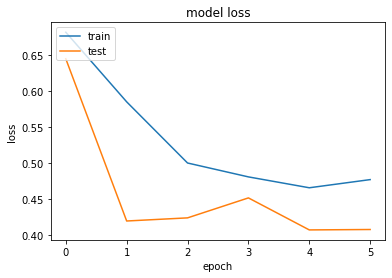

In [137]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [138]:
# predict sentiment of new tweet
new_tweet = 'I am good'
new_tweet_sequence= word_tokenizer.texts_to_sequences(new_tweet)
new_tweet_padded = pad_sequences(new_tweet_sequence, padding='post', maxlen=maxlen)
prediction = lstm_model.predict(new_tweet_padded)[0][0]
sentiment = "positive" if prediction >= 0.5 else "negative"
print(f'Prediction for "{new_tweet}": {sentiment} ({prediction:.2f})')

1/1 [==============================] - 1s 537ms/step
Prediction for "I am good": positive (0.91)
